Koneksi ke Google Drive

In [125]:
#Karena datasetnya dari Kaggle, file kaggle.json diupload ke google drive untuk kenyamanan
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pemasangan Kaggle

In [126]:
#Install kaggle API agar bisa mengunduh dataset kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
#Perintah linux untuk membuat folder ~/.kaggle/ dan mengcopy file kaggle.json ke folder tersebut
! mkdir ~/.kaggle/
! cp drive/MyDrive/kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [128]:
#Pengunduhan dataset kaggle
!kaggle datasets download -d blurredmachine/are-your-employees-burning-out

are-your-employees-burning-out.zip: Skipping, found more recently modified local copy (use --force to force download)


Ekstrasi File

In [129]:
#Ekstrasi data. Untuk kali ini , file test tidak akan dipakai karena tidak adanya label target
import zipfile
local_zip = "/content/are-your-employees-burning-out.zip"
dest_zip = "/content/are-your-employees-burning-out"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(dest_zip)
zip_ref.close()

Import library yang dibutuhkan

In [130]:
# Import pustaka
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Pemasukan file kedalam dataframe Pandas

In [131]:
#Pengecekan file. parse_dates digunakan agar data kolom "Date of Joining" lebih mudah diproses
employees_train = pd.read_csv("/content/are-your-employees-burning-out/train.csv",parse_dates=["Date of Joining"])

employees_train

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


Pengecekan tipe data dalam dataframe

In [132]:
print(employees_train.dtypes)
employees_train.describe()

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                    float64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object


,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


Pengecekan tanggal paling awal dan paling akhir

In [133]:
#Melihat tanggal maksimal dan minimal
min_date = min(employees_train["Date of Joining"])
max_date = max(employees_train["Date of Joining"])
min_date, max_date, max_date-min_date

(Timestamp('2008-01-01 00:00:00'),
 Timestamp('2008-12-31 00:00:00'),
 Timedelta('365 days 00:00:00'))

Pengecekan nilai missing value

In [134]:
employees_train.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [135]:
employees_train[employees_train.isnull().any(axis=1)]

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
8,fffe32003200300034003700,2008-12-27,Female,Service,No,3.0,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,3.0,6.0,NaN,0.67
12,fffe32003100300030003700,2008-01-20,Male,Service,Yes,2.0,5.0,NaN,0.40
13,fffe31003800330032003500,2008-02-23,Female,Product,No,1.0,3.0,NaN,0.33
...,...,...,...,...,...,...,...,...,...
22733,fffe31003800370030003000,2008-07-16,Female,Service,No,2.0,3.0,4.5,NaN
22737,fffe3300340033003100,2008-08-17,Female,Service,No,3.0,5.0,NaN,0.43
22741,fffe31003600350034003800,2008-01-07,Male,Product,No,2.0,5.0,6.0,NaN
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41


Pembuangan data yang tidak lengkap

In [136]:
#Pembuangan data-data tidak lengkap
employees_train_nonNull = employees_train.dropna()
print(employees_train_nonNull.isnull().sum())
print(employees_train_nonNull.describe())

employees_train_nonNull

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64
        Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  18590.000000         18590.000000          18590.000000  18590.000000
mean       2.179398             4.486552              5.732173      0.452444
std        1.133148             2.044848              1.920547      0.197848
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.320000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29
...,...,...,...,...,...,...,...,...,...
22743,fffe3300390030003600,2008-12-15,Female,Product,Yes,1.0,3.0,6.0,0.48
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3.0,7.0,6.2,0.54
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


Penyimpanan kolom fitur

In [137]:
features = list(employees_train_nonNull.columns)
features.remove("Burn Rate")

Pengubahan data Date of Training menjadi Join Days




In [138]:
employees_train_nonNull["Join Days"] = (max(employees_train_nonNull["Date of Joining"])-employees_train_nonNull["Date of Joining"]).dt.days
employees_train_nonNull.drop(columns=["Date of Joining"], axis=1, inplace=True)
cat_features=["Gender","Company Type","WFH Setup Available"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Plotting data kategorikal

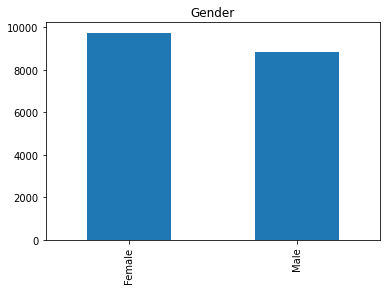

In [139]:
employees_train_nonNull[cat_features[0]].value_counts().plot(kind='bar', title=cat_features[0])

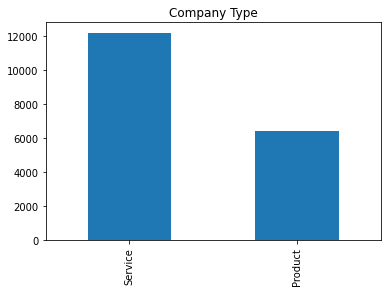

In [140]:
employees_train_nonNull[cat_features[1]].value_counts().plot(kind='bar', title=cat_features[1])

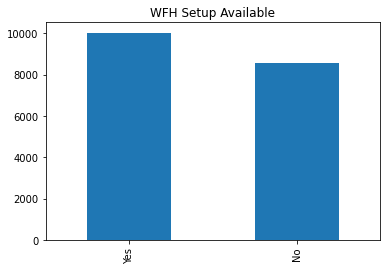

In [141]:
employees_train_nonNull[cat_features[2]].value_counts().plot(kind='bar', title=cat_features[2])

Plotting data numerikal

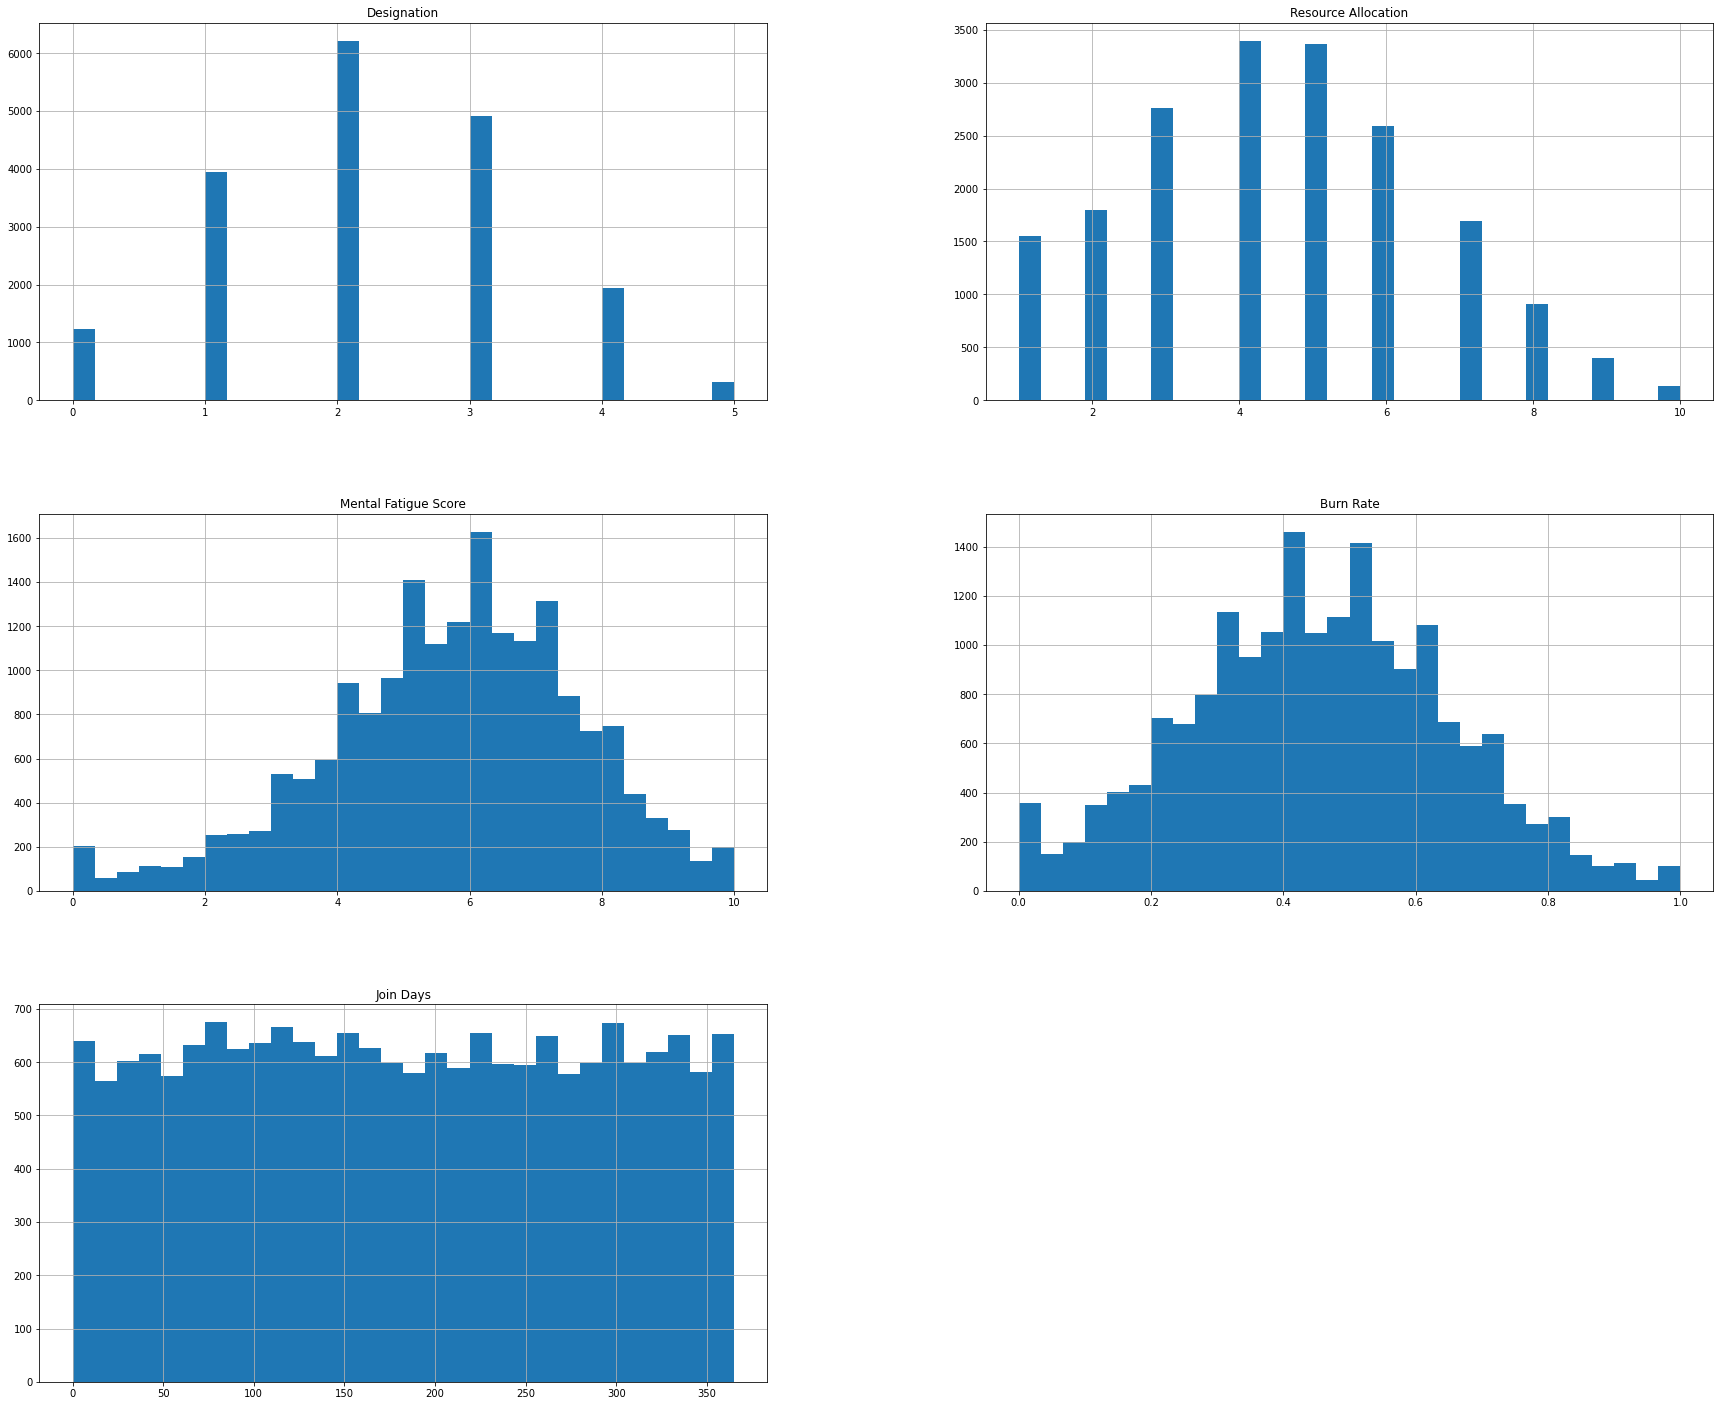

In [142]:
employees_train_nonNull.hist(bins=30, figsize=(30,25))
plt.show()


Plotting data terhadap burn rate

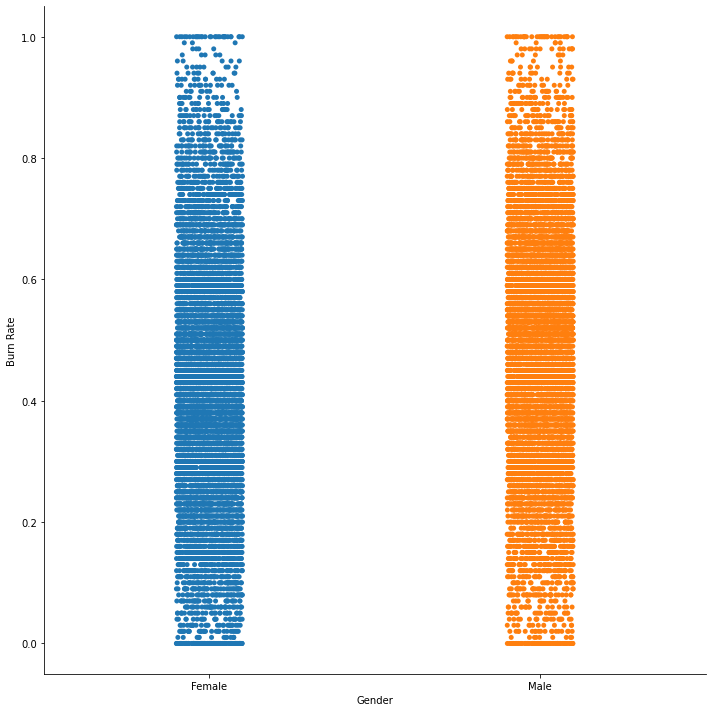

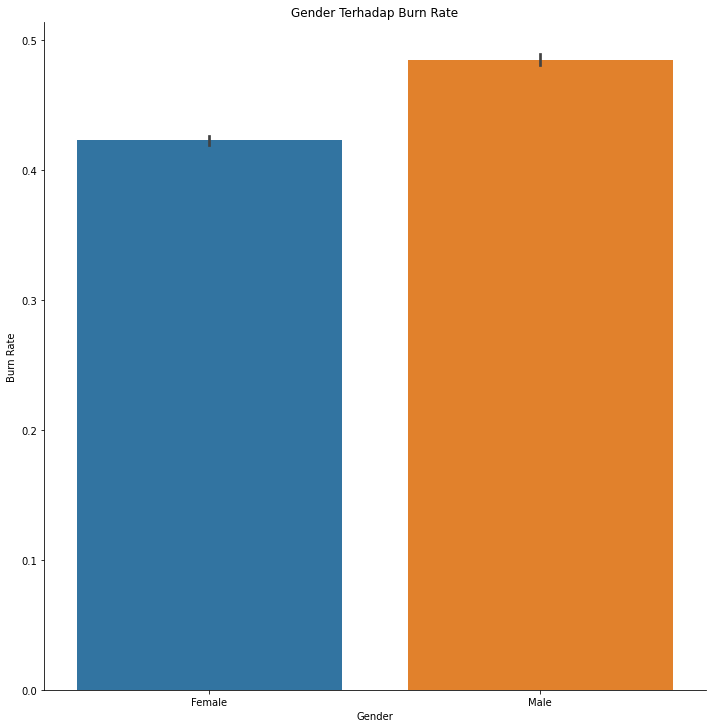

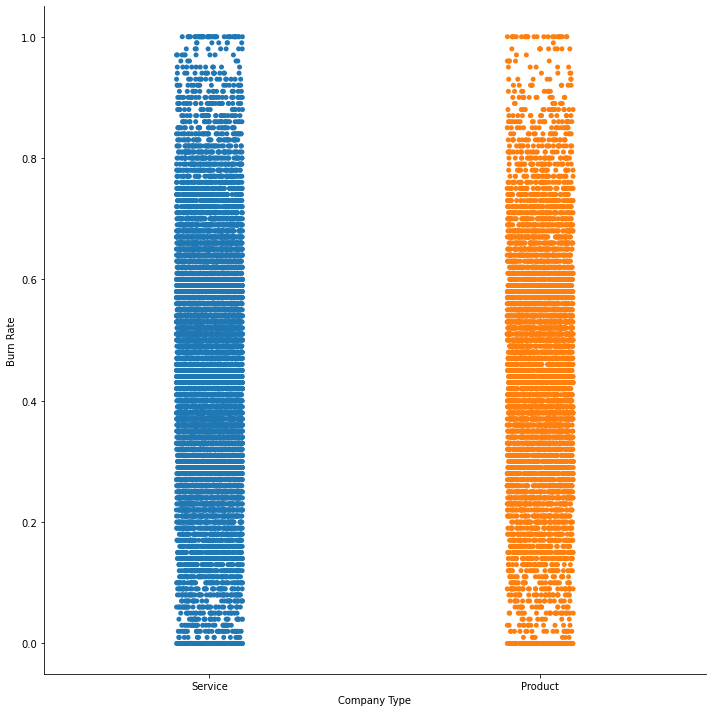

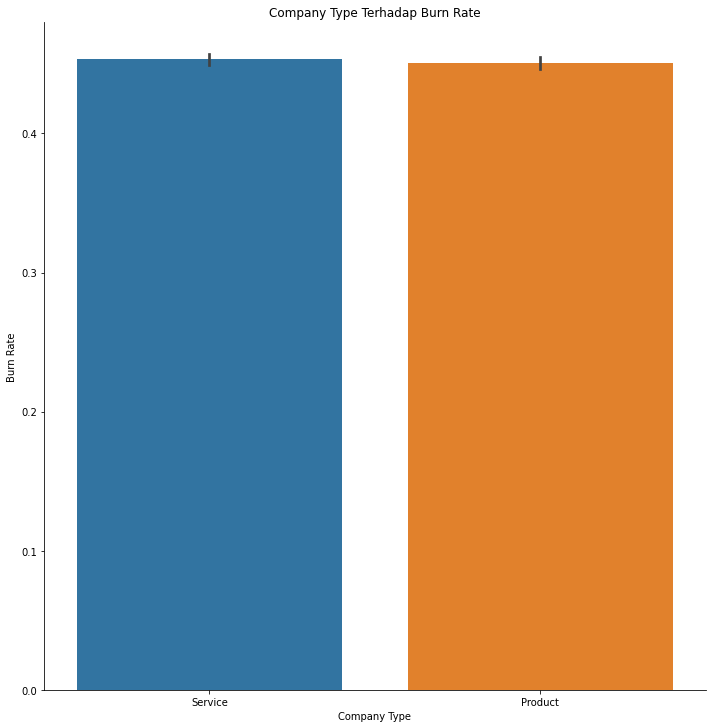

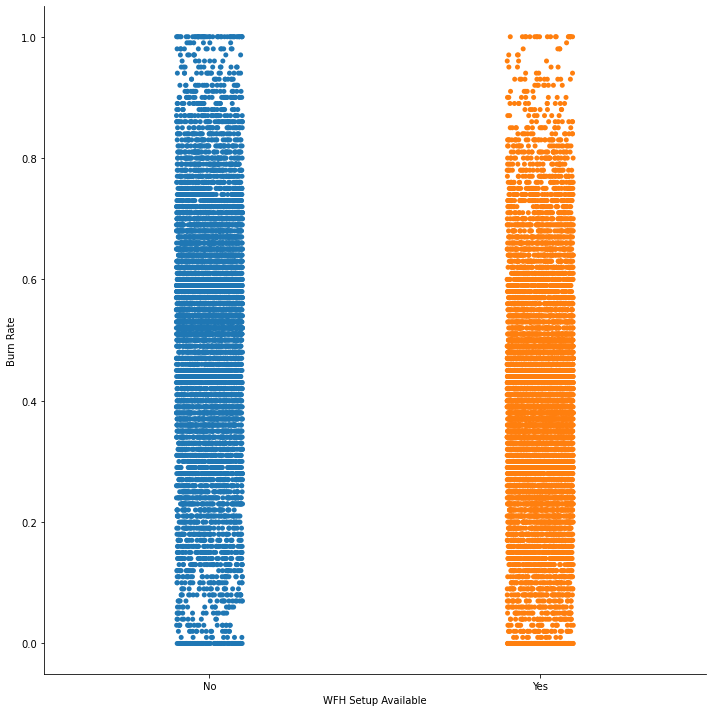

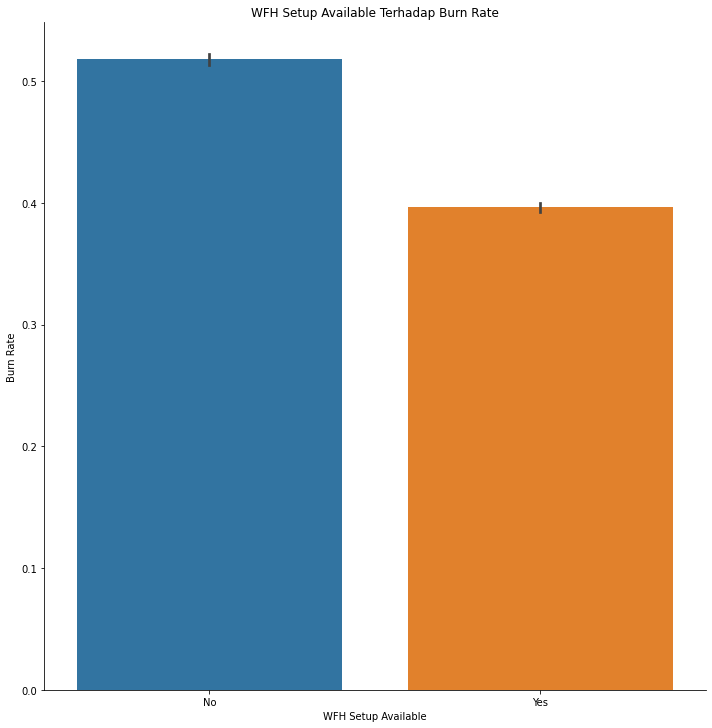

In [143]:
for column in employees_train_nonNull.select_dtypes(include='object').columns.to_list()[1:]:
  sns.catplot(x=column, y="Burn Rate",height=10, data=employees_train_nonNull)
  sns.catplot(x=column, y="Burn Rate",height=10,kind="bar", data=employees_train_nonNull)
  plt.title(column + " Terhadap Burn Rate")

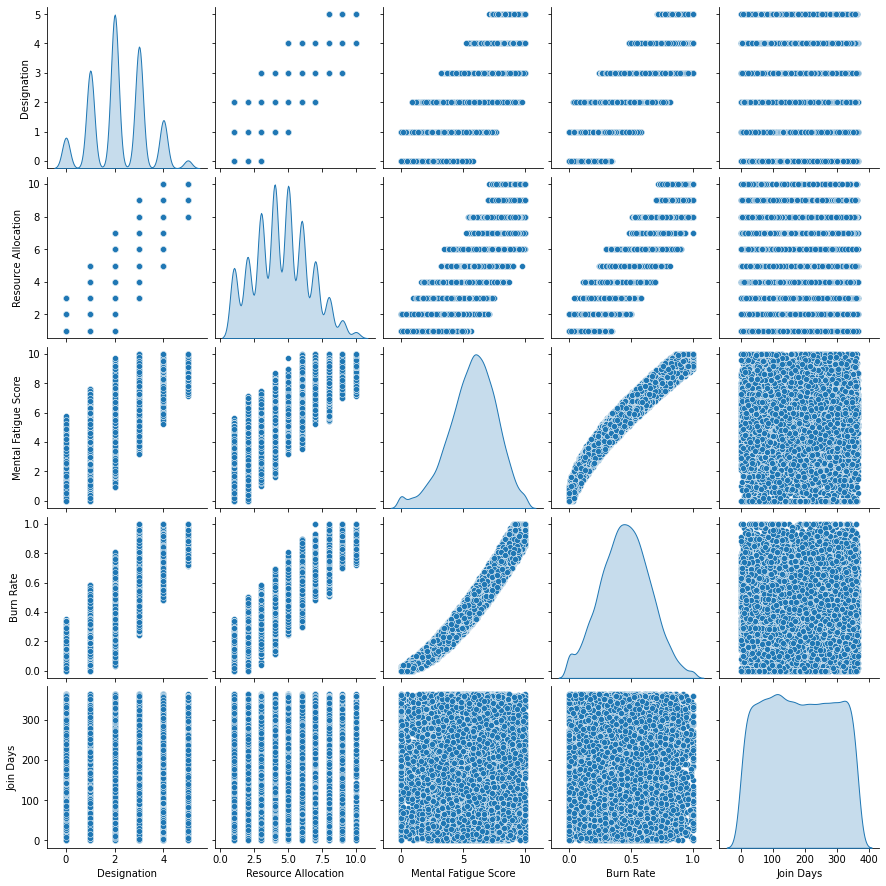

In [144]:

sns.pairplot(employees_train_nonNull, diag_kind = 'kde')

Korelasi data numerik terhadap Burn Rate

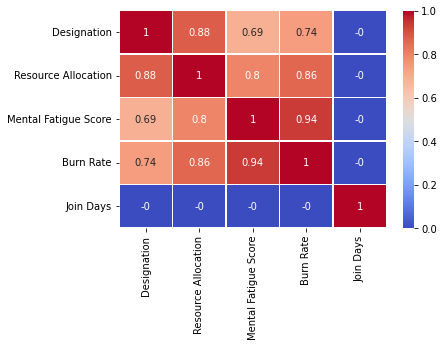

In [145]:
correlation_matrix = employees_train_nonNull.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

Pengubahan Kolom kategorikal menjadi numerik

In [146]:
#Mengubah kolom kolom tertentu menjadi angka sehingga lebih mudah diproses (datanya seragam)

target = ["Burn Rate"]
def feature_encode(pd_df):
 try:
    pd_df["IsMale"] = pd.get_dummies(pd_df["Gender"], drop_first=True)
    pd_df["IsServiceCompany"]  = pd.get_dummies(pd_df["Company Type"], drop_first=True)
    pd_df["WFH Setup Available"]  = pd.get_dummies(pd_df["WFH Setup Available"], drop_first=True)


    pd_df.drop(columns=["Gender", "Company Type"], axis=1, inplace=True)
 except:
    pass
feature_encode(employees_train_nonNull)
employees_train_nonNull

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Employee ID,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Join Days,IsMale,IsServiceCompany
0,fffe32003000360033003200,0,2.0,3.0,3.8,0.16,92,0,1
1,fffe3700360033003500,1,1.0,2.0,5.0,0.36,31,1,1
3,fffe32003400380032003900,1,1.0,1.0,2.6,0.20,58,1,1
4,fffe31003900340031003600,0,3.0,7.0,6.9,0.52,160,0,1
5,fffe3300350037003500,1,2.0,4.0,3.6,0.29,35,1,0
...,...,...,...,...,...,...,...,...,...
22743,fffe3300390030003600,1,1.0,3.0,6.0,0.48,16,0,0
22744,fffe32003500370033003200,0,3.0,7.0,6.2,0.54,218,1,0
22746,fffe33003000350031003800,1,3.0,6.0,6.7,0.59,347,0,0
22748,fffe33003300320036003900,0,2.0,5.0,5.9,0.52,356,0,1


In [147]:
features, target

(['Employee ID',
  'Date of Joining',
  'Gender',
  'Company Type',
  'WFH Setup Available',
  'Designation',
  'Resource Allocation',
  'Mental Fatigue Score'],
 ['Burn Rate'])

Pengecekan Kuantil 1 dan 3

In [148]:
#Pengecekan outliers Q3
print(employees_train_nonNull.quantile(0.25))
print(employees_train_nonNull.quantile(0.75))
Q1, Q3 = (employees_train_nonNull.quantile(0.25),employees_train_nonNull.quantile(0.75))
IQR= Q3-Q1
employees_train_nonNull[((employees_train_nonNull>(Q3+1.5*IQR))).all(axis=1)]

WFH Setup Available      0.00
Designation              1.00
Resource Allocation      3.00
Mental Fatigue Score     4.60
Burn Rate                0.32
Join Days               92.00
IsMale                   0.00
IsServiceCompany         0.00
Name: 0.25, dtype: float64
WFH Setup Available       1.00
Designation               3.00
Resource Allocation       6.00
Mental Fatigue Score      7.10
Burn Rate                 0.59
Join Days               274.00
IsMale                    1.00
IsServiceCompany          1.00
Name: 0.75, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,Employee ID,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Join Days,IsMale,IsServiceCompany


In [149]:
#Pengecekan outliers Q1
employees_train_nonNull[((employees_train_nonNull<(Q1-1.5*IQR))).all(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,Employee ID,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Join Days,IsMale,IsServiceCompany


Splitting dataset menjadi train dan valid

In [150]:
#Splitting
from sklearn.model_selection import train_test_split
Y = employees_train_nonNull["Burn Rate"]
X = employees_train_nonNull.drop(["Burn Rate","Employee ID"], axis=1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1)

Standarisasi data Training dan Valid agar mudah diolah algoritma Machine Learning

In [151]:
#Standarize
from sklearn.preprocessing import StandardScaler
num_features = ["Join Days", "Designation", "Mental Fatigue Score", "Resource Allocation"]
def standarize(x):
  scaler = StandardScaler()
  scaler.fit(x[num_features])
  x[num_features] = scaler.transform(x.loc[:, num_features])
standarize(X_train)
standarize(X_val)

In [152]:
X_train[num_features].describe().round(6)

,Join Days,Designation,Mental Fatigue Score,Resource Allocation
count,16731.000000,16731.000000,16731.000000,16731.000000
mean,0.000000,0.000000,0.000000,0.000000
std,1.000030,1.000030,1.000030,1.000030
min,-1.733670,-1.924543,-2.980884,-1.704575
25%,-0.859874,-1.042267,-0.588636,-0.727370
50%,-0.005074,-0.159992,0.087434,-0.238767
75%,0.868722,0.722284,0.711499,0.738438
max,1.733020,2.486835,2.219655,2.692849


Training and Validating

In [153]:
#Dataframe untuk kemudahan evaluasi
df_models = pd.DataFrame(columns=["train_mse","val_mse"],
                        index=["knn","randfor","boost"])

In [154]:
#Training KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, Y_train)

df_models.loc['knn','train_mse'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=Y_train)
df_models.loc['knn','val_mse'] = mean_squared_error(y_pred=knn.predict(X_val), y_true=Y_val)
df_models

,train_mse,val_mse
knn,0.002754,0.003344
randfor,NaN,NaN
boost,NaN,NaN


In [155]:
#Training RF
rf = RandomForestRegressor(n_estimators=40, max_depth=16, random_state=3, n_jobs=-1)
rf.fit(X_train, Y_train)
df_models.loc['randfor','train_mse'] = mean_squared_error(y_pred=rf.predict(X_train), y_true=Y_train)
df_models.loc['randfor','val_mse'] = mean_squared_error(y_pred=rf.predict(X_val), y_true=Y_val)
df_models

,train_mse,val_mse
knn,0.002754,0.003344
randfor,0.000822,0.003063
boost,NaN,NaN


In [156]:
#Training Boosting
boosting=AdaBoostRegressor(learning_rate=0.01, random_state=3)
boosting.fit(X_train, Y_train)
df_models.loc['boost','train_mse'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=Y_train)
df_models.loc['boost','val_mse'] = mean_squared_error(y_pred=boosting.predict(X_val), y_true=Y_val)
df_models


,train_mse,val_mse
knn,0.002754,0.003344
randfor,0.000822,0.003063
boost,0.004441,0.004496


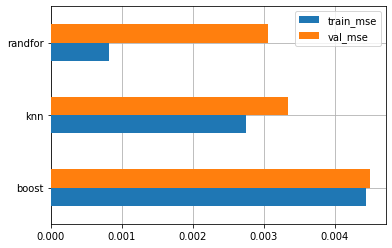

In [157]:
#Graf pengecekan. MSE terkecil diraih Random Forest Algorithm
fix,ax = plt.subplots()
df_models.sort_values(by='val_mse',axis=0, ascending=False).plot(kind="barh",ax=ax,zorder=3)
ax.grid(zorder=0)